In [12]:
import re
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt
from sklearn import grid_search, svm

In [2]:
V=[]
Vow='уеыаоэяию'
for cur in Vow:
    V.append(cur)
    
with open('anna.txt', encoding='utf-8') as f:
    anna = f.read()
with open('sonets.txt', encoding='utf-8') as f:
    sonets = f.read()

Разбиваем на предложения.

In [3]:
anna_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', anna)
sonet_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', sonets)

In [19]:

def main_function(arr):
    data = []
    for sentence in arr:
        sentence = sentence.lower()
        words = sentence.split()
        lenght = 0
        vowels = 0
        letters = {}
        words_lenght = []
        words_vowels_lenght = []
        for word in words:
            word_lenght = 0
            word_vowels = 0
            for letter in word:
                if letter != '\s':
                    lenght += 1
                    word_lenght += 1
                if letter in V:
                    vowels += 1
                    word_vowels += 1
                if letter not in letters.keys():
                    letters[letter] = 1
                else:
                    letters[letter] += 1
            words_lenght.append(word_lenght)
            words_vowels_lenght.append(word_vowels)
              
        results = (lenght, len(letters), vowels, np.median(words_lenght) , np.median(words_vowels_lenght))
        data.append(results)
    return data


In [30]:
anna_data = main_function(anna_sentences)
sonet_data = main_function(sonet_sentences)

anna_data = np.array(anna_data)
sonet_data = np.array(sonet_data)



/Users/uliamiheeva/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/uliamiheeva/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([[ 144. ,   28. ,   59. ,    6. ,    2. ],
       [  26. ,   15. ,    9. ,    4. ,    2. ],
       [ 108. ,   31. ,   42. ,    3. ,    1. ],
       ..., 
       [  97. ,   23. ,   42. ,    3. ,    1.5],
       [ 429. ,   30. ,  170. ,    4. ,    2. ],
       [  15. ,   11. ,    2. ,    5. ,    0. ]])

0 1


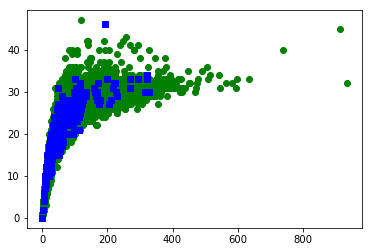

0 2


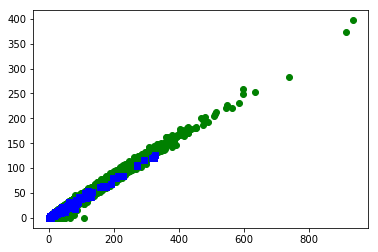

0 3


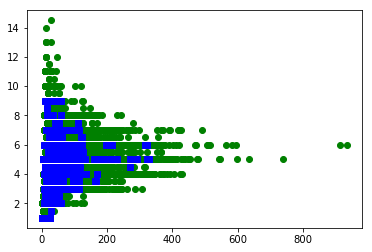

0 4


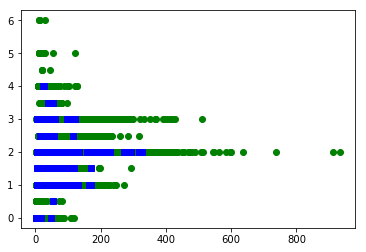

1 0


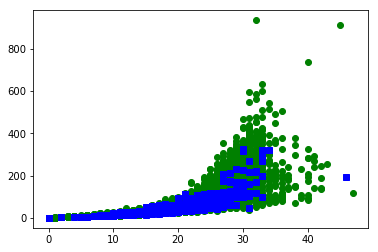

1 2


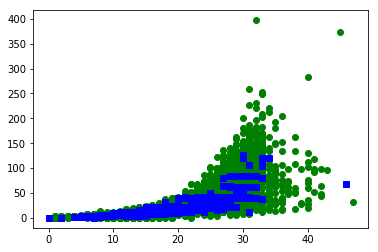

1 3


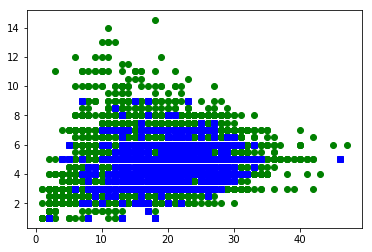

1 4


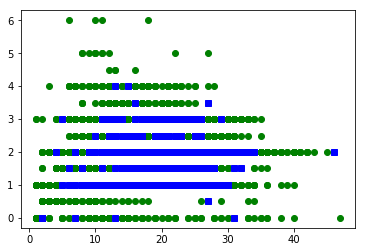

2 0


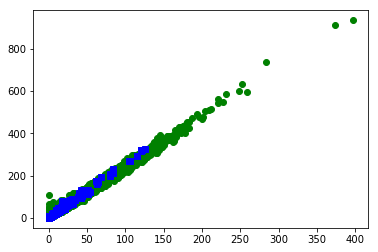

2 1


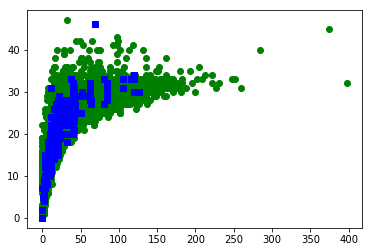

2 3


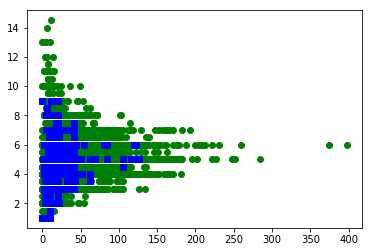

2 4


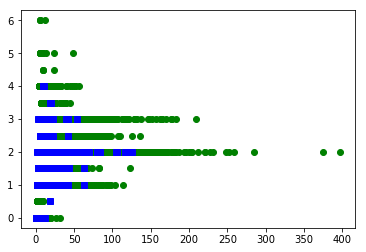

3 0


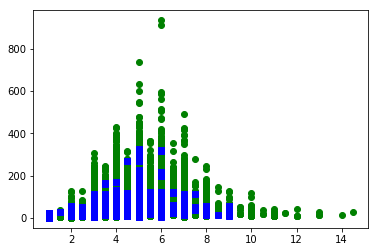

3 1


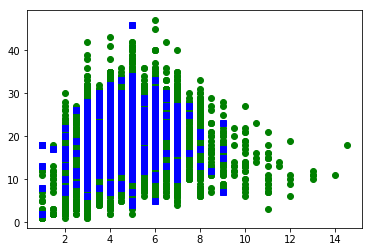

3 2


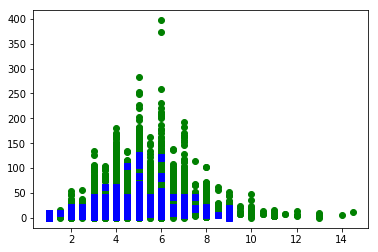

3 4


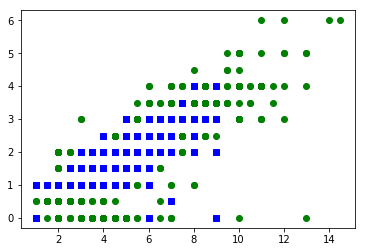

4 0


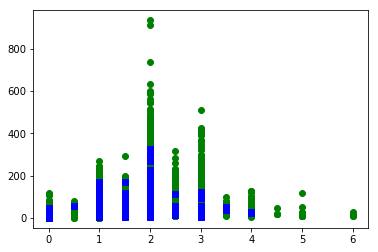

4 1


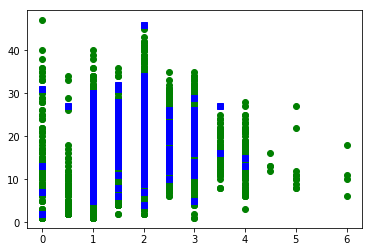

4 2


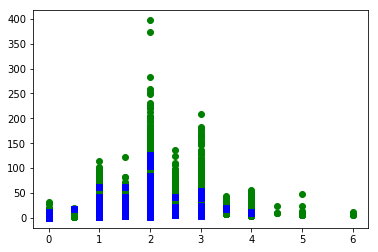

4 3


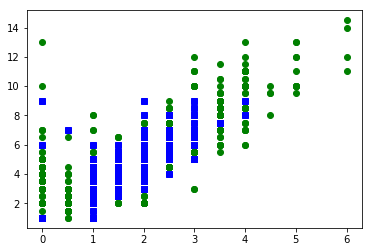

In [22]:
c1 = [0,1,2,3,4]
c2 = [0,1,2,3,4]
for q in c1:
    for q2 in c2:
        if q != q2:
            print (q,q2)
            plt.figure()
            plt.plot(anna_data[:,q] , anna_data[:,q2], 'og',
                     sonet_data[:,q] , sonet_data[:,q2], 'sb')
            plt.show()


На мой взгляд, наилучшие: 0 2 и 0 1, т.е. длина предложения + гласные и длина предложения + длина букв в слове

С ней и будем работать

Берем одинаковые кусочки.

In [53]:
anna_data1 = np.array(anna_data[:15])
sonets_data1 = np.array(sonet_data[:15])
data = np.vstack((anna_data1, sonets_data1))

In [54]:
parameters = {'C': (0.3, 0.3, 0.3, 0.4)}
gs = grid_search.GridSearchCV(svm.LinearSVC(), parameters)
gs.fit(data[:, 1:], data[:, 0])
print('Best result is ',gs.best_score_)
print('Best C is', gs.best_estimator_.C)

Best result is  0.1
Best C is 0.3


/Users/uliamiheeva/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


Приведем ошибки:

In [58]:
clf = svm.LinearSVC(C=gs.best_estimator_.C)
clf.fit(data[::2, 1:], data[::2, 0])
wrong = 0
for obj in data[1::2, :]:
    label = clf.predict(obj[1:])
    if label != obj[0] and wrong < 3:
        print( obj[0] , label , obj[1:])
        wrong += 1
    if wrong > 3:
       break



26.0 [ 110.] [ 15.   9.   4.   2.]
109.0 [ 112.] [ 22.  47.   6.   2.]
52.0 [ 110.] [ 22.  22.   4.   2.]


/Users/uliamiheeva/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/uliamiheeva/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/uliamiheeva/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it cont